# Graph Learning

In [1]:
%pylab inline
import pandas as pd
import pickle as pkl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from mat_adj import Adj , file

In [3]:
def selfN(x,B,C):
    return -B*x + C*tanh(x)

## Dynamics in general

We know that for any graph system, the node signals follow:

$$
 \frac{d \vec{x}}{dt} = M_0(\vec{x}) + diag(M_1(\vec{x}))A M_2(\vec{x}) 
$$

Using these dynamics, it should be theoretically possible to learn back the adjacency matrix of the network that produced the signals.   

In [4]:
Dynamics = { "R1": (lambda x: -1*x , lambda x: ones(len(x)) , lambda x: x/(1+x)) , "R2":(lambda x: -(x)**(0.4) , lambda x: ones(len(x))  , lambda x: (x**(0.2)/(1 + x**(0.2)))), "P":(lambda x: - x**(0.5) , lambda x: ones(len(x))  , lambda x: x**(0.2)) , "M":(lambda x: x(1- x*x) , lambda x: x , lambda x: x/(1+x)) , "E":(lambda x: -1*x , lambda x: x**(0.5) , lambda x: x**2) , "N":(selfN , lambda x: ones(len(x))  , lambda x: tanh(x)) }

In [5]:
Type = "R1"
M0 = Dynamics[Type][0]
M1 = Dynamics[Type][1]
M2 = Dynamics[Type][2]

In [17]:
N = 21
T = 1000
A_gt = pkl.load(open("./Adj.pkl","rb"))

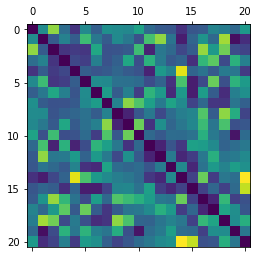

In [18]:
matshow(A_gt)

In [8]:
dt = 0.01
x0 = abs(randn(N,))
x0

array([1.49171487, 0.69186256, 0.2831994 , 1.17622467, 0.29030048,
       0.51900103, 0.65206351, 0.35100817, 0.49699633, 0.31253207,
       0.93966295, 0.47478445, 0.75510288, 1.42449692, 0.28517062,
       1.22476468, 0.25408892, 0.22761297, 0.96798889, 0.05746182,
       0.85128154])

In [9]:
x = x0
Traj = []

for i in range(T):
    Traj.append(x)
    x = x + (M0(x) + dot(diag(M1(x)), dot(A_gt,M2(x))))*dt

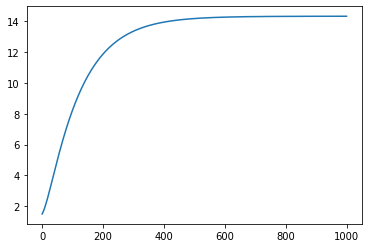

In [10]:
plot([(Traj[i])[0] for i in range(T)])

In [11]:
k = 4
samples = [Traj[k*i] for i in range(T//k)]
derivs = [(samples[i+1] - samples[i])/(k*dt) for i in range(T//k - 1)]

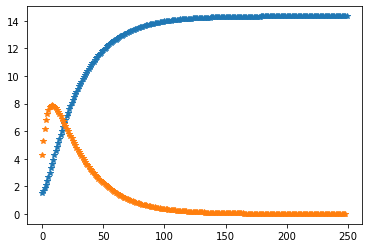

In [12]:
plot(array(samples)[:,0],"*")
plot([i for i in range(T//k - 1)], array(derivs)[:,0],"*")

In [13]:
whos

Variable   Type        Data/Info
--------------------------------
A_gt       ndarray     21x21: 441 elems, type `float64`, 3528 bytes
Adj        function    <function Adj at 0x7f3686d76e60>
Dynamics   dict        n=6
M0         function    <function <lambda> at 0x7f3684468310>
M1         function    <function <lambda> at 0x7f364ac9b490>
M2         function    <function <lambda> at 0x7f364ac9b400>
N          int         21
T          int         1000
Traj       list        n=1000
Type       str         R1
derivs     list        n=249
dt         float       0.01
file       function    <function file at 0x7f3686d77c70>
i          int         999
k          int         4
os         module      <module 'os' from '/usr/lib/python3.10/os.py'>
pd         module      <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
pkl        module      <module 'pickle' from '/u<...>ib/python3.10/pickle.py'>
samples    list        n=250
selfN      function    <function selfN at 0x7f3686d760e0>
x        